In [1]:
import numpy as np
import pylidc as pl
import pandas as pd
import matplotlib.pyplot as plt
from pylidc.utils import consensus
from skimage.measure import find_contours
import os
from scipy.ndimage import gaussian_filter
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats.stats import pearsonr

# Analysing medical data to help improve society's quality of life

How can we medical data to help improve society's quality of life?<br>
There is endless types of medical data out there for different diseases, which data should we use in order to help as many people as possible?<br>
In other words, which diseases have the most significant negative impact on society's quality of life as of today?

The ***prevelance*** of the disease alone is not enough to quantify this, take herpes for example. The herpes simplex virus is one of the most common diseases on earth. It is estimated that well over 50% of the world population is infected with the virus. However, most people are completely unaware that they are and show little to no symptoms. There is no cure and once you are infected, the virus will most likely stay in your body for the rest of your life.<br> 
***Conclusion:*** quality of life is only significantly effected if the disease causes pain or limits the patient ablilities.

The most severe effect of a disease is when it causes death, after all, you can't have any "quality of life" anymore if your life has come to an end. <br> 
***Conclusion:*** If we want to have a big impact on society's quality of life it might be interesting to look at the diseases that cause the most deaths.

## Most common causes of death

In [2]:
data=pd.read_csv("annual-number-of-deaths-by-cause.csv")
print(data.shape)
data.head(5)

(6686, 36)


,Entity,Code,Year,Dementia,Cardiovascular diseases,Kidney disease,Respiratory disease,Liver disease,"Diabetes, blood and endocrine disease",Digestive disease,...,Heat-related deaths (hot or cold exposure),Nutritional deficiencies,Suicide,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Conflict (deaths),Terrorism (deaths)
0,Afghanistan,AFG,1990,856.0,28372.0,2708.0,3394.0,1349.0,6177.0,1708.0,...,222.0,567.0,703.0,NaN,6469.977091,22836.912346,295.382207,1607.703797,1508.0,12.0
1,Afghanistan,AFG,1991,908.0,30368.0,2851.0,3641.0,1443.0,6522.0,1792.0,...,230.0,588.0,754.0,NaN,6347.158764,22325.633931,303.866598,1558.132316,3498.0,68.0
2,Afghanistan,AFG,1992,970.0,33035.0,3057.0,3967.0,1572.0,7009.0,1911.0,...,250.0,623.0,820.0,NaN,6659.741428,23205.280750,317.750121,1617.721576,4341.0,49.0
3,Afghanistan,AFG,1993,1066.0,36512.0,3329.0,4398.0,1735.0,7655.0,2071.0,...,289.0,674.0,894.0,NaN,8068.386263,28229.715397,333.978331,1931.808553,NaN,NaN
4,Afghanistan,AFG,1994,1161.0,40285.0,3641.0,4870.0,1911.0,8377.0,2243.0,...,315.0,731.0,977.0,NaN,9432.845127,32652.297630,348.419085,2351.629206,9090.0,22.0


For each "Entity" the year ranges from 1990 to 2017

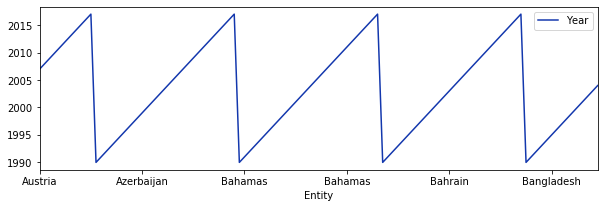

In [3]:
data[380:490].plot(x='Entity',y='Year',color='#1337AD', figsize = (10,3))

One of the entities is "world" which contains the summations over all countries. Let's see which diseases are most prevelent world wide

In [4]:
df = data[data["Entity"]=='World'].iloc[:,2:].sort_values(6572, ascending=False, axis=1)

Text(0.5, 1.0, 'Amount of recorded deaths 1990-2017')

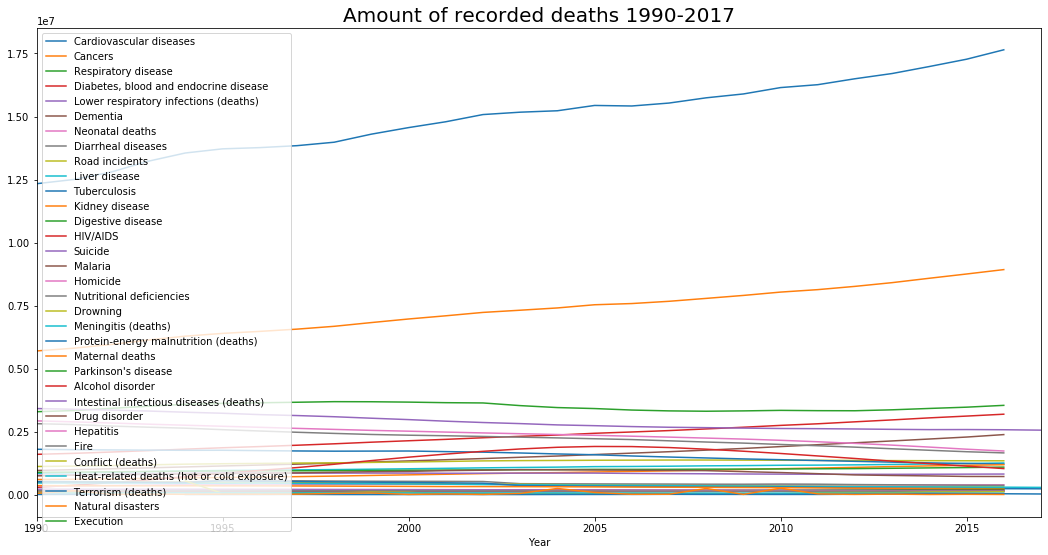

In [5]:
df.plot(x='Year', figsize=(18,9))
plt.title('Amount of recorded deaths 1990-2017', fontsize=20)

It is clear that cardiovascular disease is by far the most common cause of death, followed by cancer, respiratory disease, ... <br> Note that cardiovascular diease is also the faster growing cause of death!

Out of sheer curiosity, let's check if cardiovascular disease is the leading cause of death in every country! (in 2016)

In [6]:
df = data[data['Year']==2016]

In [7]:
df = df[np.isfinite(df['Cardiovascular diseases'])].fillna(0)

In [8]:
df.head()

,Entity,Code,Year,Dementia,Cardiovascular diseases,Kidney disease,Respiratory disease,Liver disease,"Diabetes, blood and endocrine disease",Digestive disease,...,Heat-related deaths (hot or cold exposure),Nutritional deficiencies,Suicide,Execution,Meningitis (deaths),Lower respiratory infections (deaths),Intestinal infectious diseases (deaths),Protein-energy malnutrition (deaths),Conflict (deaths),Terrorism (deaths)
26,Afghanistan,AFG,2016,2903.0,80333.0,8048.0,9922.0,4086.0,21413.0,4079.0,...,447.0,636.0,2248.0,6,6672.896174,21359.253797,435.834889,1363.976372,16502.0,6142.0
54,Albania,ALB,2016,958.0,13002.0,390.0,767.0,308.0,687.0,187.0,...,5.0,5.0,181.0,0,18.791867,372.204796,0.167811,3.294710,0.0,0.0
82,Algeria,DZA,2016,11868.0,71758.0,7544.0,6130.0,3846.0,18323.0,2489.0,...,112.0,127.0,1436.0,0,393.549374,4757.142031,153.756749,84.184354,47.0,9.0
110,American Samoa,ASM,2016,8.0,100.0,21.0,17.0,6.0,74.0,6.0,...,2.0,1.0,5.0,0,0.737231,13.583508,0.784349,1.460883,0.0,0.0
166,Andorra,AND,2016,99.0,238.0,8.0,42.0,9.0,27.0,20.0,...,0.0,0.0,8.0,0,0.252947,30.006232,0.003741,0.129850,0.0,0.0


In [9]:
booleans = np.array(df.max(axis=1)) == np.array(df['Cardiovascular diseases'])
print(booleans)

[ True  True  True False False  True False  True  True  True  True  True
 False False  True False  True  True False  True False False  True  True
 False  True False  True False False  True False False False  True False
  True  True  True False  True  True  True False  True  True  True  True
  True  True  True  True False False False  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True False
  True  True  True  True False False False  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True False False  True  True  True  True  True
  True False  True  True  True  True  True False  True  True False  True
 False False False False  True  True  True False  True  True  True  True
  True False  True False  True False  True  True False False  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True  True False  True  True  True Fa

In [10]:
print('Cardiovascular disease is the leading cause of death in '+str(np.round(100*sum(booleans)/len(booleans),2))+'% of the listed countries.')

Cardiovascular disease is the leading cause of death in 67.71% of the listed countries.


In [11]:
booleans = np.array(df.max(axis=1)) == np.array(df['Cancers'])
print('Cancer is the leading cause of death in '+str(np.round(100*sum(booleans)/len(booleans),2))+'% of the listed countries.')

Cancer is the leading cause of death in 4.04% of the listed countries.


## Cardiovascular disease

Data source: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [12]:
df=pd.read_csv("cardio_train.csv", delimiter=';')
print(df.shape)
df.head(5)

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


The age of each patient is given in days, let's turn this into years first by making the approximation that a year is 365 days.

In [13]:
df['age'] = df['age'] / 365

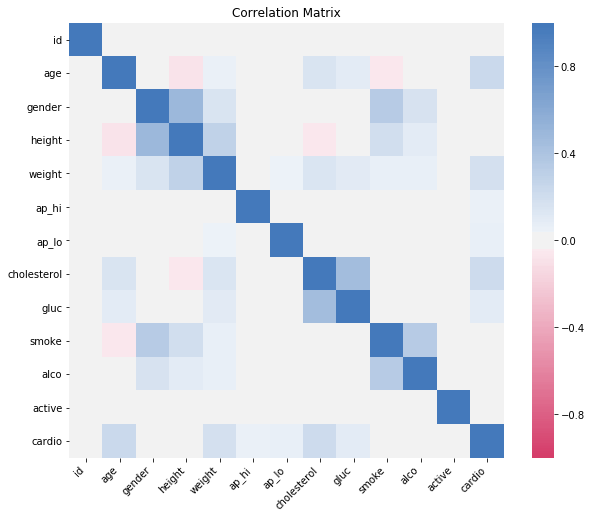

In [14]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 250, n=200),
    square=True
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Matrix')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The very last column of the data "cardio" is a binary value which determines wether the concidered person was diagnosed with cardio vascular disease. Note that in reality heart disease is not at all "binary", as it doesn't quanity the severity/type of cardio vascular disease.<br>

Let's try to get a deeper understanding of the different features in this dataset before attemption to draw conclusions.

### Age

Why is cardiovascular disease the most common cause of death? <br>
From a medical point of view, cardiovascular disease is fairly well understood, so why is it that as of today it can't simply be prevented?

It turns out that cardiovascular disease comes with a certain level of "inevetability", this is in part due to a phenonmenon known as "arterial stiffening" which is directly related to ageing.

Large arteries are roughly devided into 3 main sections:
<img src="section-artery.jpg" width="400" height="180">

It is the middle section that causes the main problem, it contains elastic fibres (a protein known as elastin) which gives the artery its elastic properties and helps the blood to be pumped around in your body. As it turns out, since this layer is sandwhiched between two other layers, our body has trouble repairing/replacing the elastin as it degrades over time. Additionally it has been shown that elastin proteins have an approximate half-life of 74 years (Shapiro et al., 1991). This value is relatively close to the current life expectancy in developed countries (~80y). <br> (Another direct reason for ageing is telomere shorting which causes DNA damage and cell death).

Observe that, the feature "age" is most strongly correlation to the prevalence of cardio vascular disease which is very much expected concidering what was discussed above.

### Cholesterol

Cholesterol plays a crucial role in the cell membrane of every cell in your body, it also helps your body synthesize steroid hormones, bile acid and vitamin D. So how is it possible that its prevalence is so strongly correlated to the most common cause of death?

Cholesterol is a lipid, it is a type of "fat". It can build up excessively in the blood circulation and can be hard for the body to remove. The cholesterol (plaque) attaches to the blood vessel walls caussing them to narrow. This negatively effects the heamodynamics and can ultimately result in total occlusion of a blood vessle. The blockage results in poor perfusion and thus insufficient oxygen being delivered to the tissue.<br>

<img src="plaque.png" width="300" height="130">

### Blood Pressure

* Short term: When you drink a large amount of fluid or eat something (salty), your blood pressure will rise. In young, healthy individuals the body is easily coutneracts this by its many negative feedback loops.

* Long term: Blood pressure increases with age as a result of arterial stiffening, build up of cholesterol, ... <br>

### Sceptisism about this dataset!!

It is commonly known that Blood pressure is strongly correlated to age, this is not at all reflected in the correlation matrix above. In fact, both ap_hi & ap_lo (systolic & diastolic blood pressure resp.) seem to be almost completely uncorrelated to any other feature. This is very counter intuitive and gives us the suspicion that these columns are perhaps artificially added into the dataset.

In [15]:
# the age range seems reasonable
print(np.sort(df['age'].unique()))

[29.58356164 29.75068493 29.80273973 ... 64.90958904 64.93424658
 64.96712329]


In [16]:
# there seem to be some very short and tall people in this dataset !! (shortest person ever recorded was 54.6 cm)
print(np.sort(df['height'].unique()))

[ 55  57  59  60  64  65  66  67  68  70  71  72  74  75  76  80  81  91
  96  97  98  99 100 104 105 108 109 110 111 112 113 117 119 120 122 125
 128 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 200 207
 250]


In [17]:
# the smallest man ever recorded weighed 14.5 kg
print(np.sort(df['weight'].unique()))

[ 10.    11.    21.    22.    23.    28.    29.    30.    31.    32.
  33.    34.    35.    35.45  36.    37.    38.    39.    40.    41.
  42.    42.2   43.    44.    45.    45.8   46.    47.    48.    49.
  50.    50.5   50.7   51.    51.5   52.    52.3   53.    53.2   53.3
  53.5   53.6   53.67  53.9   54.    54.35  54.5   54.9   55.    55.2
  55.4   55.6   56.    56.2   57.    57.4   57.6   57.8   58.    58.5
  58.7   58.8   59.    59.2   59.5   59.8   60.    60.1   60.2   60.5
  60.6   61.    61.2   61.3   61.5   62.    62.2   62.3   62.4   62.5
  62.7   63.    63.4   63.8   63.82  64.    64.1   64.3   64.5   64.7
  64.8   65.    65.3   65.5   66.    66.3   66.4   66.5   67.    67.3
  67.5   67.8   67.9   68.    68.2   68.3   68.4   68.5   68.9   69.
  69.5   69.8   70.    70.2   70.3   70.5   70.7   70.8   71.    71.2
  71.3   71.5   72.    72.1   72.5   72.8   73.    73.2   73.5   73.8
  74.    74.2   74.3   74.5   74.77  75.    75.2   75.5   75.6   76.
  76.5   76.7   76.8   77

In [18]:
# We can assume these negative pressures to be typos, their magnitude is realistic, In reality BP rarely goes higher than 200
print(np.sort(df['ap_hi'].unique()))

[ -150  -140  -120  -115  -100     1     7    10    11    12    13    14
    15    16    17    20    24    60    70    80    85    90    93    95
    96    97    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   165   166   167   168
   169   170   171   172   173   174   175   176   177   178   179   180
   181   184   185   187   188   190   191   193   195   196   197   199
   200   202   207   210   215   220   230   240   309   401   701   806
   902   906   907   909   960  1110  1130  1202  1205  1300  1400  1409
  1420  1500  1620  2000 11020 11500 13010 14020 16020]


In [19]:
#Fix the negative values
df['ap_hi'] = abs(df['ap_hi'])

### Other interesting correlations

Interestingly, the strongest correlations in this dataset are not related to cardiovascular disease:

- height ~ gender
- height ~ weight
- cholesterol ~ glocuse levels (unhealthy diet)
- smoking ~ alcohol (unhealthy lifestyles)
- smoking ~ gender

**side quest:** Especially the last correlation is interesting. Which gender smokes most? How big is this difference?

In [13]:
GS = df[['gender','smoke']]

In [14]:
females = GS[GS['gender']==1]
males = GS[GS['gender']==2]

In [15]:
print('male smokers: '+str(np.round(100*sum(males['smoke'])/males.size, 3))+'%')
print('female smokers: '+str(np.round(100*sum(females['smoke'])/females.size, 3))+'%')

male smokers: 10.944%
female smokers: 0.893%


According to this dataset, men smoke 10x more than woman!<br>
This approximately agrees with findings in literature.

Height & weight are also clearly strongly correlated, which makes a lot of sense. We would be more interested in the "obesity" of the patient, which is better quantified by the Body Mass Index: BMI = weight / height². Let us remove "height" and "weight" from out dataframe and instead combine them into BMI.

In [16]:
df['weight'] = df['weight'] / (df['height']/100)**2

df = df.rename(columns = {"weight": "BMI"})

df = df.drop(columns=['height'])

In [17]:
df.head()

,id,age,gender,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,21.967120,110,80,1,1,0,0,1,0
1,1,20228,1,34.927679,140,90,3,1,0,0,1,1
2,2,18857,1,23.507805,130,70,3,1,0,0,0,1
3,3,17623,2,28.710479,150,100,1,1,0,0,1,1
4,4,17474,1,23.011177,100,60,1,1,0,0,0,0


### Feature importance

Correlations alone aren't always an accurate way of describing which features are truly important. Forest algorithm to determine which features are important:

In [18]:
train_X = data.iloc[:,1:-1]
train_y = data.iloc[:,-1]

Feature ranking:
1. feature 0 (0.288216)age
2. feature 4 (0.178424)ap_hi
3. feature 3 (0.178285)weight
4. feature 2 (0.170644)height
5. feature 5 (0.109126)ap_lo
6. feature 6 (0.045512)cholesterol
7. feature 7 (0.011245)gluc
8. feature 1 (0.005526)gender
9. feature 10 (0.004731)active
10. feature 9 (0.004199)alco
11. feature 8 (0.004092)smoke


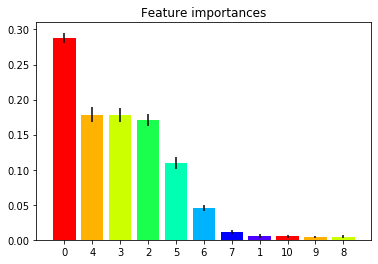

In [19]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])+train_X.columns[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices], color=[(1, 0, 0, 1),(1, 0.7, 0, 1),(0.8, 1, 0, 1),(0.1, 1, 0.3, 1),(0, 1, 0.7, 1),(0, 0.7, 1, 1),(0, 0, 1, 1),(0.3, 0, 1, 1)], yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

We find similar results as to the correlations, however, here the blood pressure (ap_hi: systolic BP, ap_lo: diastolic BP) seem to play much more important roles, as well as height.

## Map CV disease vs Cancer ratio

Source: https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [20]:
import geopandas as gpd

shapefile = 'data/countries_110m/ne_110m_admin_0_countries.shp'
datafile = 'data/annual-number-of-deaths-by-cause.csv'

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [21]:
df = pd.read_csv(datafile)

df = df[['Code','Year','Cardiovascular diseases','Cancers']]
df['ratio'] = df['Cardiovascular diseases'] / df['Cancers']
df.head()

,Code,Year,Cardiovascular diseases,Cancers,ratio
0,AFG,1990,28372.0,6483.0,4.376369
1,AFG,1991,30368.0,6912.0,4.393519
2,AFG,1992,33035.0,7495.0,4.407605
3,AFG,1993,36512.0,8218.0,4.442930
4,AFG,1994,40285.0,8978.0,4.487080


In [22]:
df_2016 = df[df['Year'] == 2016]

In [23]:
merged = gdf.merge(df_2016, left_on = 'country_code', right_on = 'Code', how = 'left')
merged.head()

,country,country_code,geometry,Code,Year,Cardiovascular diseases,Cancers,ratio
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,2016.0,2754.0,791.0,3.481669
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,2016.0,57112.0,32183.0,1.774601
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,2016.0,81352.0,85102.0,0.955935
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,2016.0,901411.0,685162.0,1.315617


In [24]:
import json

#Read data to json
merged_json = json.loads(merged.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)

In [25]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][7]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 7)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '1': '1', '2':'2', '3':'3', '4':'4', '5':'5', '6':'6','7':'7'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=7,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Ratio of cardiovascular disease to cancer, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'ratio', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

Did you know large hospitals can generate up to hundreds of terabytes of medical data each year? <br>
Aditionally, the amount of data hospitals generate only increase with time.

In many countries (almost all developed countries), hospitals are by law required to store this medical data for 5 to 10 years.

As (_nascent_) datascientists we recognize that this medical data can be provide priceless amount of information that could help improve health care. <br>
When properly refigned, this data could have a significant impact on society's quality of life.

It is therefore very dissapointing that as of today the large majority of medical data is simply stored and left unused, primarily due to privacy laws and regulations.

However, the consesus surrounding this topic is starting to shift and effort are being made to help the medical field reap the benefits of Data Science.

One of these effort is a website called "The Cancer Imaging Archieve (TCIA)" https://www.cancerimagingarchive.net/ <br>
Which contains a wealth of medical imaging data in a large variety of different forms (CT, MRI, microscopic biopsy, radiographs, ...)

In this notebook specifically, we will be looking at one of the most extensive datasets that can be found in this archive. <br>
The LIDC-IDRI dataset contains 1013 thoracic CT scans. These come in DICOM file format but can easily be transfered to numpy arrays.

All the CT scans in the dataset were taken with the intent of diagnosing / ruling out lung cancer.  <br>

Some facts about lung cancer that make this dataset all that more interesting:

- Cancer is the second most common cause of death only preceded by cardiovascular disease.
- Lung cancer is the second most prevelent form of cancer in both men and woman (secondary to prostate and breast cancer respectively).
- Lung cancer is one of the most lethal forms of cancer as it only has a 5 year survival rate of 20%

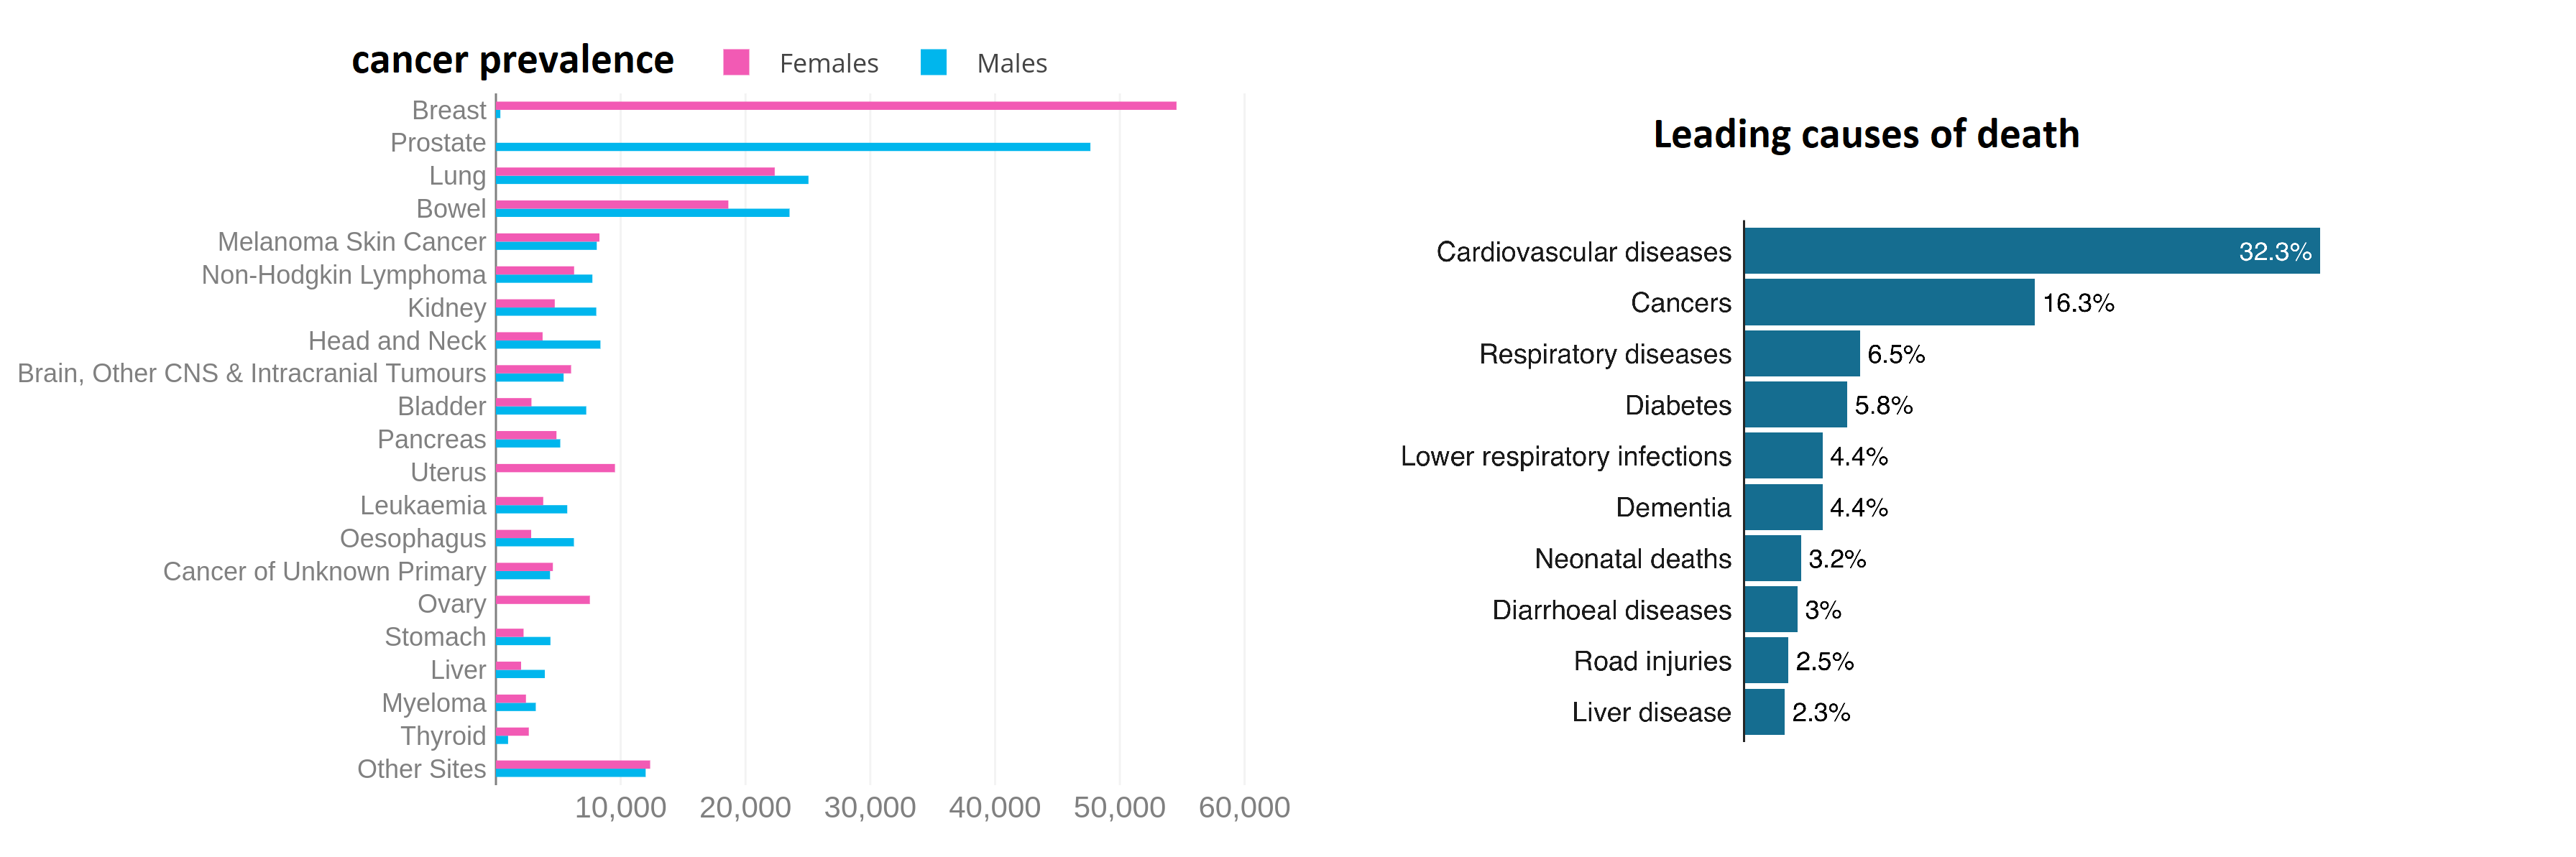

The combination of its high mortality and prevelence make lung cancer by far the most common cause of cancer related death.

This makes early diagnosis all that more important, the earlier a patient is diagnosed, the faster he/she can be treated, the higher the chance of recovery.

In addition to the 1013 CT scans, the dataset includes annotations from 4 different radiologists.
These annotations were obtained independently, afterwards the radiologists discussed their findings and finilized a total of 2669 detected long nodules (tumors).<br>
In realitiy there is even more nodules(7371), however, the radiologists only retained nodules that have an equivalent diameter greater than 3 mm. This is set as a thresh hold since smaller nodules are often not as harmful.<br>
The total count of nodules aswell as more information regarding the malignancy of the nodules is provided in xls files.

These annotations make this dataset especially interesting for applications in machine learning & computer aided diagnosis.

Loading dicom files ... This may take a moment.


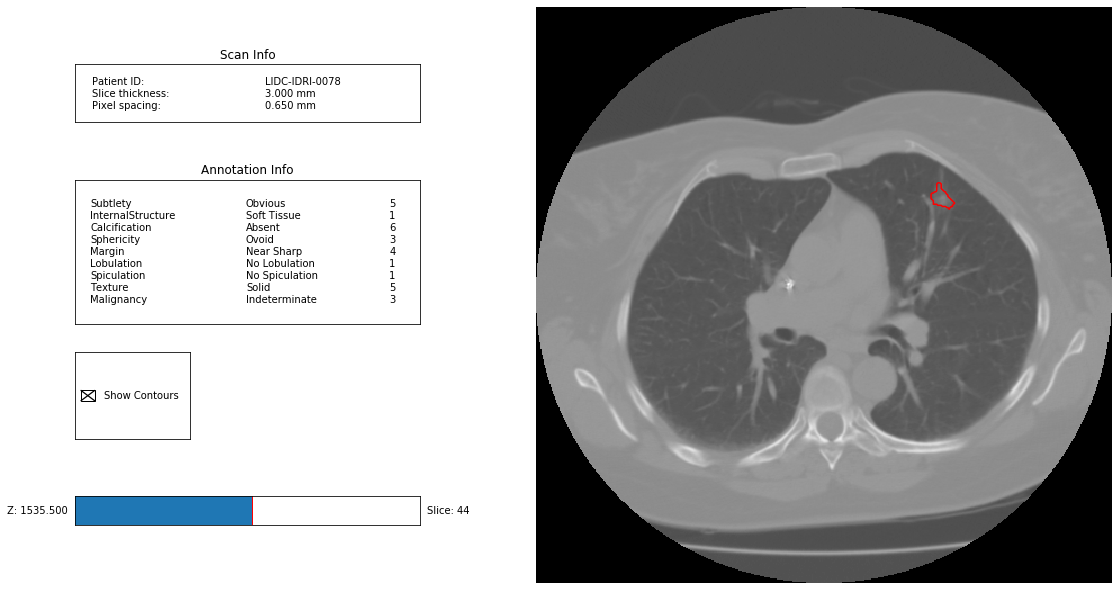

In [21]:
ann = pl.query(pl.Annotation)[0]
ann.visualize_in_scan()

However, they are also interesting for many other Data Science applications.

Some ideas:

- one could compare the shapes/sizee of the individual nodules and find a correlation with malignancy, in reality more spherical tumors tend be more likely to be benign.

 Spherephicity is a self-evident way of quantifying this.
 To every annotation a number can be assigned that represents how closely the shape represents a sphere (1: sphere, 0: lower dimensional shape)

Malignant tumor
Sphericity: 0.8273486867112941


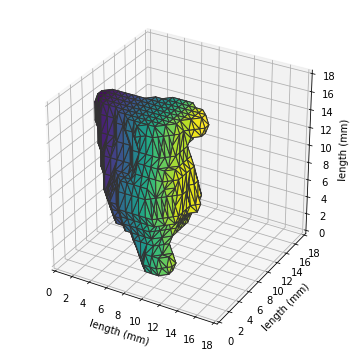

In [22]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 5)[5]
print('Malignant tumor')
print('Sphericity: '+str(np.power(6*ann.volume, 2/3)*np.power(np.pi, 1/3)/ann.surface_area))
ann.visualize_in_3d()

Benign tumor
Sphericity: 0.8777946395184181


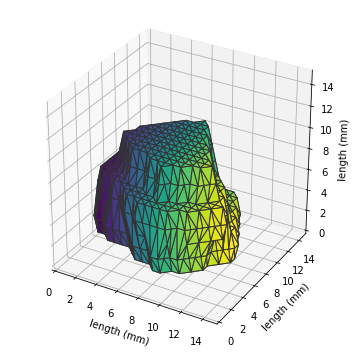

In [23]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 1)[1]
print('Benign tumor')
print('Sphericity: '+str(np.power(6*ann.volume, 2/3)*np.power(np.pi, 1/3)/ann.surface_area))
ann.visualize_in_3d()

- One could look at the variance between the annotations of different radiologists and showcase the inconsistency of diagnosis between different radiologists. This problem may bemuch less prevalent in computer aided diagnosis.

Loading dicom files ... This may take a moment.


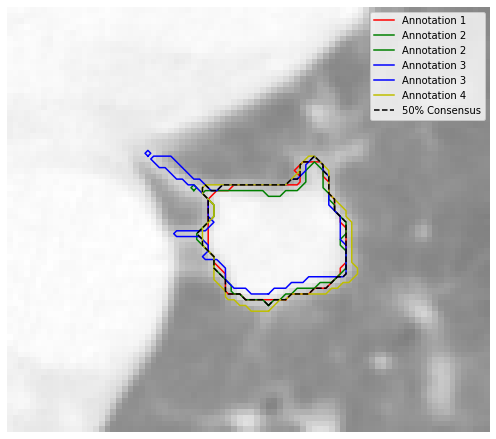

In [24]:
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0078').first()
vol = scan.to_volume()

nods = scan.cluster_annotations()
anns = nods[0]

cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])

k = int(0.5*(cbbox[2].stop - cbbox[2].start))

fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)

colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):
    for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
        label = "Annotation %d" % (j+1)
        plt.plot(c[:,1], c[:,0], colors[j], label=label)

for c in find_contours(cmask[:,:,k].astype(float), 0.5):
    plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

- One could use the large amount of annotations to contruct a probability map that can provide insight into which areas of the lung are most likely to develope tumors.

In [25]:
os.chdir('D:\Cropped')
nodules = np.zeros((512,512,200))
tumor_vol = np.zeros(1013)
i=1
while i < 1013:
    try:
        nod = np.load('_'+str(i)+'.npz')['arr_0']
        tumor_vol[i] = np.sum(nod)
        nodules += nod
        i+=1
    except:
        i+=1

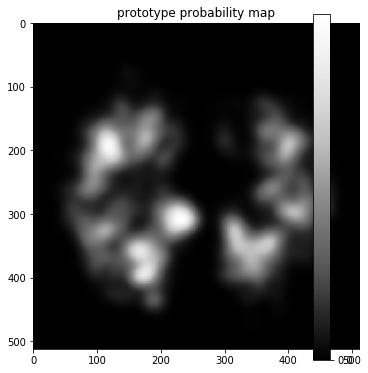

In [26]:
prob_map = gaussian_filter(nodules, sigma=10)

H = np.array(prob_map[:,:,95])
fig = plt.figure(figsize=(6, 6))
    
ax = fig.add_subplot(111)
ax.set_title('prototype probability map')
plt.imshow(H, cmap='Greys_r')
ax.set_aspect('equal')
    
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

This "probability distribution" suggests that tumors are more likely to form around the edges of the lung rather than around the primary bronchi, This may be explain by the fact that there is most tissue deeper in the lungs
Note: this plot is not at all correct as it does not take into account that the lungs have different volumes.
Ideally we want to rescale the nodule from the original lungs to a standerdized lung shape and project it on that standerdize lung

- Since the scale of each scan is know, using some segmentation algorithm we can estimate, forexample, the size of the patient. This can than be used together with the nodule counts to find correlations between the size of the patient and lung cancer.

The size/weight of the cells that make up the body of a big person are the same as those making up the body of a smaller person. This means that bigger people simply have more cells than smaller people. If the probability of a cell mutating to form cancer is approximately independent of how big a person is, there should be a linear relationship between the size of a person, and there probability to develope lung cancer.

For now I have used lung volume instead, altough it may seem like a logical assumption that there should be a linear relation between the size of a patient and their lung volume, we have to take into concideration that in the end we will be comparing lung volume to tumor volume, while the tumor volume may have a significant impact on lung volume. (when lungs are diseased, they tend to decrease in size). Thus, a future improvement would be segmenting the soft tissue instead (new problem: soft tissue is not completely captures in CT scan)

In [27]:
os.chdir('D:\Lungs')

In [28]:
lung = np.load('_'+str(2)+'.npz')['arr_0']
lung[lung>0.01]=1

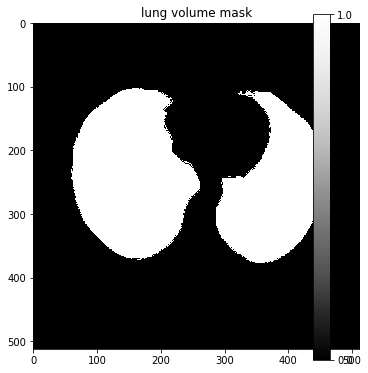

In [29]:
H = np.array(lung[:,:,60])
fig = plt.figure(figsize=(6, 6))
    
ax = fig.add_subplot(111)
ax.set_title('lung volume mask')
plt.imshow(H, cmap='Greys_r')
ax.set_aspect('equal')
    
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

In [30]:
lung_vol = np.zeros(1013)
i=0
while i < 1013:
    try:
        lung = np.load('_'+str(i)+'.npz')['arr_0']
        lung[lung>0.01]=1
        lung_vol[i] = np.sum(lung)
        i+=1
    except:
        i+=1

C:\Users\NathanSennesael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


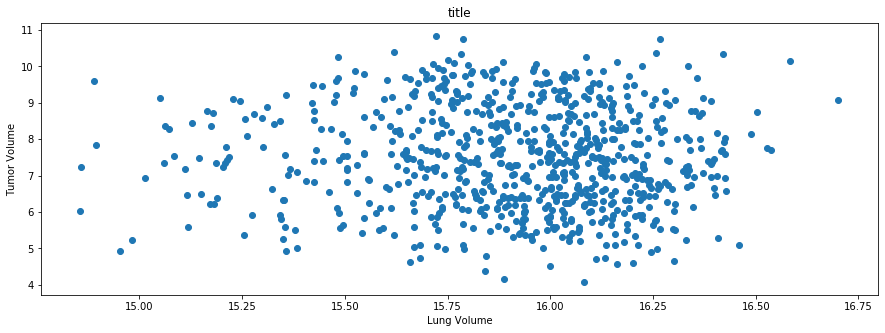

In [31]:
plt.figure(figsize=(15, 5))
plt.scatter(np.log(lung_vol), np.log(tumor_vol))
plt.title("title")
plt.xlabel("Lung Volume")
plt.ylabel("Tumor Volume")
plt.show()

In [34]:
print('Almost insignificant correlation: '+str(pearsonr(lung_vol, tumor_vol)[0]))

Almost insignificant correlation: -0.03003838063723314


**Notes:**
- All the above results are prototypes with much room for improvement
- Im not sure how specific our topic has to be, we can explore other forms of medical data rather than only this lung cancer example.